# Sinals and Systems Project II

**Unit 2, Systems. <br />
Rafael Figueredo Guimarães**

In [1366]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import timeit
import warnings
import statsmodels.api as sm
from scipy import integrate
%matplotlib inline
warnings.filterwarnings('ignore')

# Verificação de Linearidade

De acordo com o livro, Lathi, o sinal é linear se atende a seguinte condição 

$ k_{1}x_{1} + k_{2}x_{2} == k_{1}y_{1} + k_{2}y_{2} $

Logo a função a baixo retorna um boolean, com **True** caso seja linear, **False** c.c
~~~ python 
    def checkLinearity(Tr):
~~~

O sistema é linear.


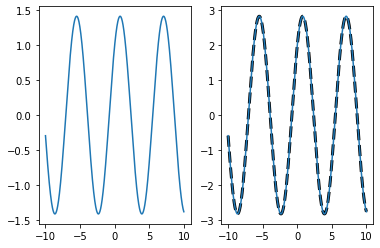

In [1367]:
t = np.linspace(-10, 10, 1000)

x1 = lambda t: np.sin(t)
x2 = lambda t: np.cos(t)

def Tr(x):
    return lambda t: 2*x(t)

def checkLinearity(Tr):
     
    x1plusx2 = lambda t: x1(t) + x2(t)
    a_x1plusx2 = lambda t: a * x1plusx2  
    
    plt.subplot(121)
    plt.plot(t, x1plusx2(t), label=r'$x_1(t)+x_2(t)$')
    
    plt.subplot(122)
    
    plt.plot(t, Tr(x1)(t)+Tr(x2)(t), 'k--', lw=3, label=r'$Tr\{x_1(t)\}+Tr\{x_2(t)\}$')
    plt.plot(t, Tr(x1plusx2)(t), label=r'$Tr\{x_1(t)+x_2(t)\}$')
    
    for ti in t:
        if Tr(x1)(ti)+Tr(x2)(ti) != Tr(x1plusx2)(ti):
            return False
    return True


def testeLinearidade(Tr):
        if ( checkLinearity(Tr) ):
            print("O sistema é linear.")
        else:
            print("O sistema não é linear.")
    

testeLinearidade(Tr)

In [1368]:
def Tr2(x):
    return lambda t: 2**x(t)

O sistema não é linear.


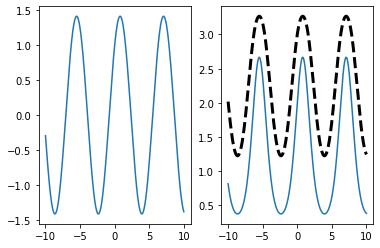

In [1369]:
testeLinearidade(Tr2)

# Verificação de Causalidade

Causalidade significa que a saída do sistema não depende de entradas futuras, mas apenas de entradas anteriores. 
a função:

~~~ python
def checkCausality(Tr)
~~~

retornará **True** se o sistema for causal, **False** c.c

True

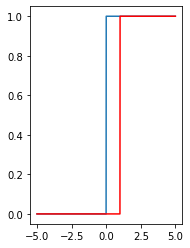

In [1370]:
t = np.linspace(-5, 5, 1000)
x = lambda t: (t>=0).astype(float)

def Tr3(x):
    return lambda t: x(t-1)

def Tr4(x):
    return lambda t: x(t+1)

def checkCausality(Tr):
    
    plt.plot(t, x(t), label='Input $x(t)$')
    plt.plot(t, Tr(x)(t), label=r'Output $y(t)=Tr\{x(t)\}$', color = 'red')
    
    for ti in t:
        if Tr(x)(ti) > x(ti):
            return False
    
    return True
            
plt.subplot(121)
checkCausality(Tr3)

False

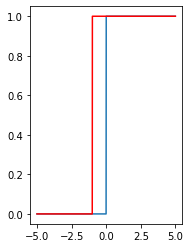

In [1371]:
plt.subplot(122)
checkCausality(Tr4)

# Verificação de Memória

Um sistema possui memória se o valor do instante atual depende de valores da entrada em instantes passados ou futuros.

Para verificamos se o sistema possui **memória** vamos analisar 3 casos:

  1. Como a função se comporta quando recebe casos passados $Tr1 = x(t-1)$
  2. Como a função se comporta quando recebe casos futuros  $Tr2 = x(t+1)$
  3. Como a função se comporta quando recebe apenas presente $Tr3 = x(t) + 2*x(-t)$
  
  A função 
  
  ~~~python
    def checkMemory(Tr)
  ~~~
  
  retorna **True** se o Sistema possuir memória, **False** c.c.


True

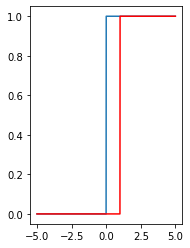

In [1372]:
x = lambda t: (t>=0).astype(float)

def Tr5(x):
    return lambda t: x(t-1)

def Tr6(x):
    return lambda t: x(t+1)

def Tr7(x):
    return lambda t: 2*x(t) + x(-t)


def checkMemory(Tr):
    
    plt.plot(t, x(t), label='Input $x(t)$')
    plt.plot(t, Tr(x)(t), label=r'Output $y(t)=Tr\{x(t)\}$', color = 'red')
    
    signalzeros = 0
    signalNotzeros = 0
    
    systemzeros = 0
    systemNotzeros = 0
    
    flag = 1
    
    for ti in t:
        
        if (flag):
            fistvalue = Tr(x)(ti)
            flag = 0
            
        
        if (x(ti) == 0):
            signalzeros += 1
        else:
            signalNotzeros += 1
        
        
        if ( Tr(x)(ti) == fistvalue ):
            systemzeros += 1
        else:
            systemNotzeros += 1
            
    
    if ( systemzeros == signalzeros ): 
        return False
    else: 
        return True
            
            
plt.subplot(121)
checkMemory(Tr5)

No primeiro caso o teste retornou **True** ou seja possui memória porque depende de valores passados.

True

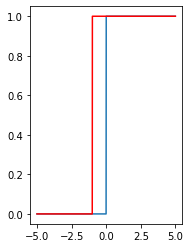

In [1373]:
plt.subplot(122)
checkMemory(Tr6)

No segundo caso o teste retornou **True**, possui memória porque depende de valores futuros.

False

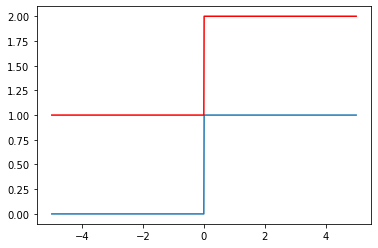

In [1374]:
checkMemory(Tr7)

No terceiro caso o teste retornou **False**, pois não depende de valores futuros ou passados. Agora vamos testar essas propriedades com a sinal formado pela função seno

In [1375]:
x = lambda t: np.sin(t)

def Tr8(x):
    return lambda t: x4(t+1)

True

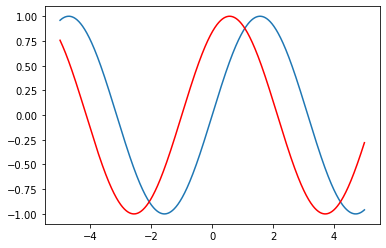

In [1376]:
checkMemory(Tr8)

# Verificação de Invariancia no Tempo

Sistemas cujos paramêtros **não são alterados no tempo** são invariantes no tempo.

In [1377]:
t = np.linspace(-2,4,1000)
x = lambda t: np.exp(-t)*(t>=0).astype(float)

def Tr10(x):
    return lambda t: t*x(t)

def Tr11(x):
    return lambda t: x(2*t)

def Tr12(x):
    return lambda t: x(2*t)


def checkTimeInvariance(Tr):
    
    T = 1
    
    HxtTzero = Tr(x)(t-T)
    y = Tr( lambda t: x(t) )
    ytTzero = y(t-T)
    
    
    plt.subplot(121)
    plt.plot(t, x(t), label='$x(t)$')
    plt.plot(t, x(t-0.5), label=r'$x(t-\frac{1}{2})$')
    plt.plot(t, x(t-1), label=r'$x(t-1)$')
    
    plt.subplot(122)
    y1 = Tr(x)
    y2 = Tr(lambda t: x(t-0.5))
    y3 = Tr(lambda t: x(t-1))
    plt.plot(t, y1(t), label=r'$Tr\{x(t)\}$')
    plt.plot(t, y2(t), label=r'$Tr\{x(t-\frac{1}{2})\}$')
    plt.plot(t, y3(t), label=r'$Tr\{x(t-1)\}$')
    
    
    # checando a invariancia no tempo: Tr{x(t)} = y(t) ⇒ Tr{x(t−t0)} = y(t−t0)
    
    for ti in range(len(HxtTzero)):
        if HxtTzero[ti] != ytTzero[ti]:
            return False
        
    return True

Sistema é variante no tempo


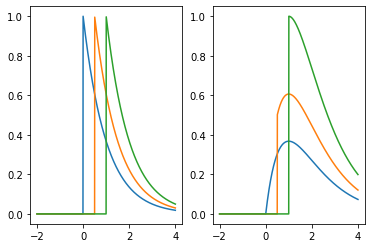

In [1378]:
if (checkTimeInvariance(Tr10)):
    print("Sistema é variante no tempo")
else:
    print("Sistema é invariante no Tempo") # não varia com o tempo

Sistema é variante no tempo


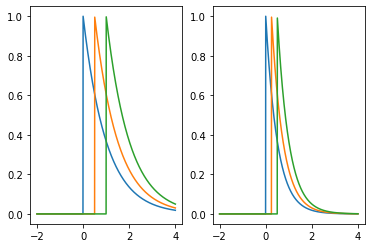

In [1379]:
if (checkTimeInvariance(Tr11)):
    print("Sistema é variante no tempo")
else:
    print("Sistema é invariante no Tempo") # não varia com o tempo

Apesar de parecer inviante esse sistema varia com o tempo de acordo com [[1]](https://dspillustrations.com/pages/posts/misc/linearity-causality-and-time-invariance-of-a-system.html "DSP Illustrations")

# Verificação de Estabilidade

Para verificar a propriedade de estabilidade será aplicado o mesmo exemplo das notas de aulas disponível em [[2]](https://presencial.ifpb.edu.br/pluginfile.php/54883/mod_resource/content/7/classificacao_sistemas.pdf "Notas de Aulas, Paulo Ribeiro") <br />

A função:

~~~ python
def checkEstability(Tr)
~~~ 
    
Retornará **True** se o sistema for estável, **False** c.c.

In [1380]:
t = np.arange(-100, 100, 1)
x = lambda t: (t>=0).astype(int)

def Tr13(x):
    return lambda t: t*x(t)

In [1381]:
def checkEstability(Tr):
    
    plt.subplot(121)
    plt.plot(t, x(t))
    
    plt.subplot(122)
    plt.plot(t, Tr(x)(t))
    
    # aplicando uma regressão 
    
    X = t
    y = Tr(x)(t)
    
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    
    coef = model.params[0]
    
    coef = np.around(coef, 1)
    
    if coef > 0.1:
        return False
    
    return True

    

False

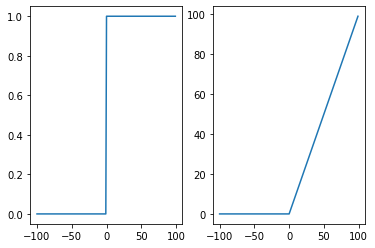

In [1382]:
checkEstability(Tr13)

Primeiro exemplo da nota de aula, também disponível no Oppenhain.

$H{(t)} = t*x(t)$

In [1383]:
def Tr14(x):
    return lambda t: np.exp(x(t))

Segundo exemplo da nota de aula, também disponível no Oppenhain.

$ H{(t)} = e ^ {x(t)} $

True

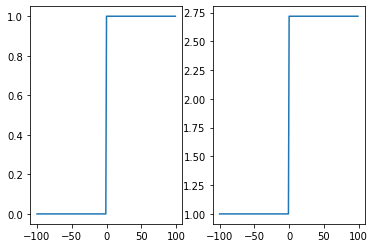

In [1384]:
checkEstability(Tr14)

# Verificação de Invertibilidade

Para verificar a propriedade de invertibilidade será aplicado o mesmo exemplo das notas de aulas disponível em [[2]](https://presencial.ifpb.edu.br/pluginfile.php/54883/mod_resource/content/7/classificacao_sistemas.pdf "Notas de Aulas, Paulo Ribeiro") <br />

A função:

~~~ python
def checkInvetibility(Tr)
~~~ 
    
Retornará **True** se o sistema for inversível, **False** c.c.

In [1400]:
t = np.linspace(-10, 10, 1000)
x = lambda t: 2*t 

def checkInvetibility(Tr, Trinv):
    
    y1 = Tr(x)(t)
    y2 = Trinv(x)(y1)
    
    plt.subplot(121)
    plt.plot(t, y1)
    
    plt.subplot(122)
    plt.plot(t, y2)
    
    for ti in t:
    
        y1 = Tr(x)(ti)
        y2 = Trinv(x)(y1)
        
        if y1 != y2:
            return False
    
    return True

In [1401]:
def Tr15(x):
    return lambda t: 2*x(t)

def Tr15inv(x):
    return lambda t: (1/2)*x(t)

True

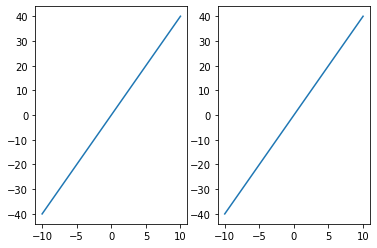

In [1402]:
checkInvetibility(Tr15, Tr15inv)

Conforme mostrado a aplicação da função retornou **True** peceba que o sistema usado foi o primeiro exemplo das notas de aula, vamos testar com o segundo exemplo. 

In [1403]:
def Tr16(x):
    return lambda t: np.power(x(t), 2.0)

def Tr16inv(x):
    return lambda t: np.power(x(t), (1/2)) 

False

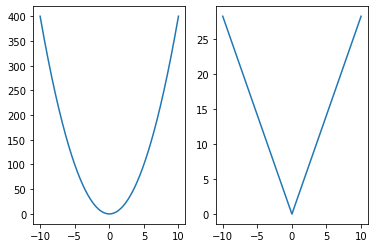

In [1404]:
checkInvetibility(Tr16, Tr16inv)